# A Decision Tree Classification Example

There is a famous small data set called the *Iris* flower data set or Fisher's *Iris* data set from 1936 that is used as a  classification example. It contains only 150 rows of data, where there are 50 samples from each of three species of *Iris*. There are four features/variable/columns. We'll use this classic example to see how you could use a decision tree to make a multi-class classification decision.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Get the data set
iris = sns.load_dataset('iris')

In [3]:
# Look at it
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Take a peek
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Sample it
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,versicolor
73,6.1,2.8,4.7,1.2,versicolor
8,4.4,2.9,1.4,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
134,6.1,2.6,5.6,1.4,virginica


<Axes: xlabel='species', ylabel='count'>

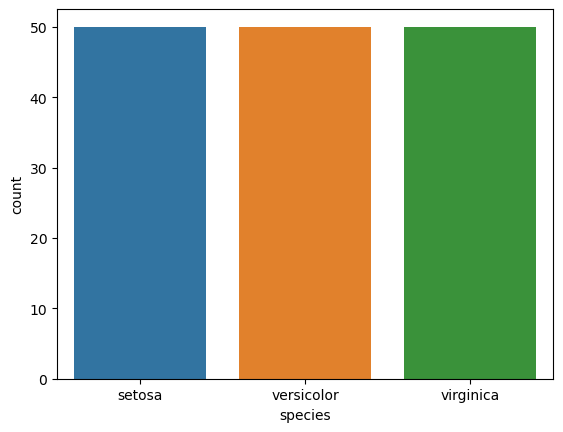

In [7]:
sns.countplot(x='species', data=iris)

## Create $X$ and $y$ and Split Data

We now create our $X$ and $y$ variables. We are trying to predict `species`, so that is our $y$ variable. We will then split the data into trainoing and test sets.

In [8]:
# X is everything but species
X = iris.drop(columns=['species'])

# y is species
y = iris.species

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 98 to 3
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


<Axes: xlabel='species', ylabel='count'>

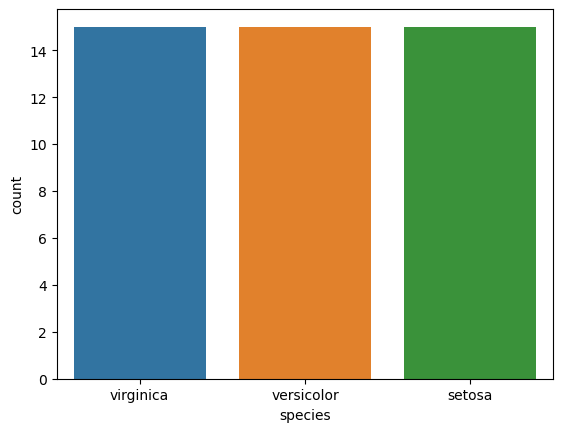

In [10]:
# Plot y_test to make sure stratification occurred
sns.countplot(x=y_test)

In [11]:
# Create and fit DecisionTreeClassifier on training data
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [12]:
dt

DecisionTreeClassifier()

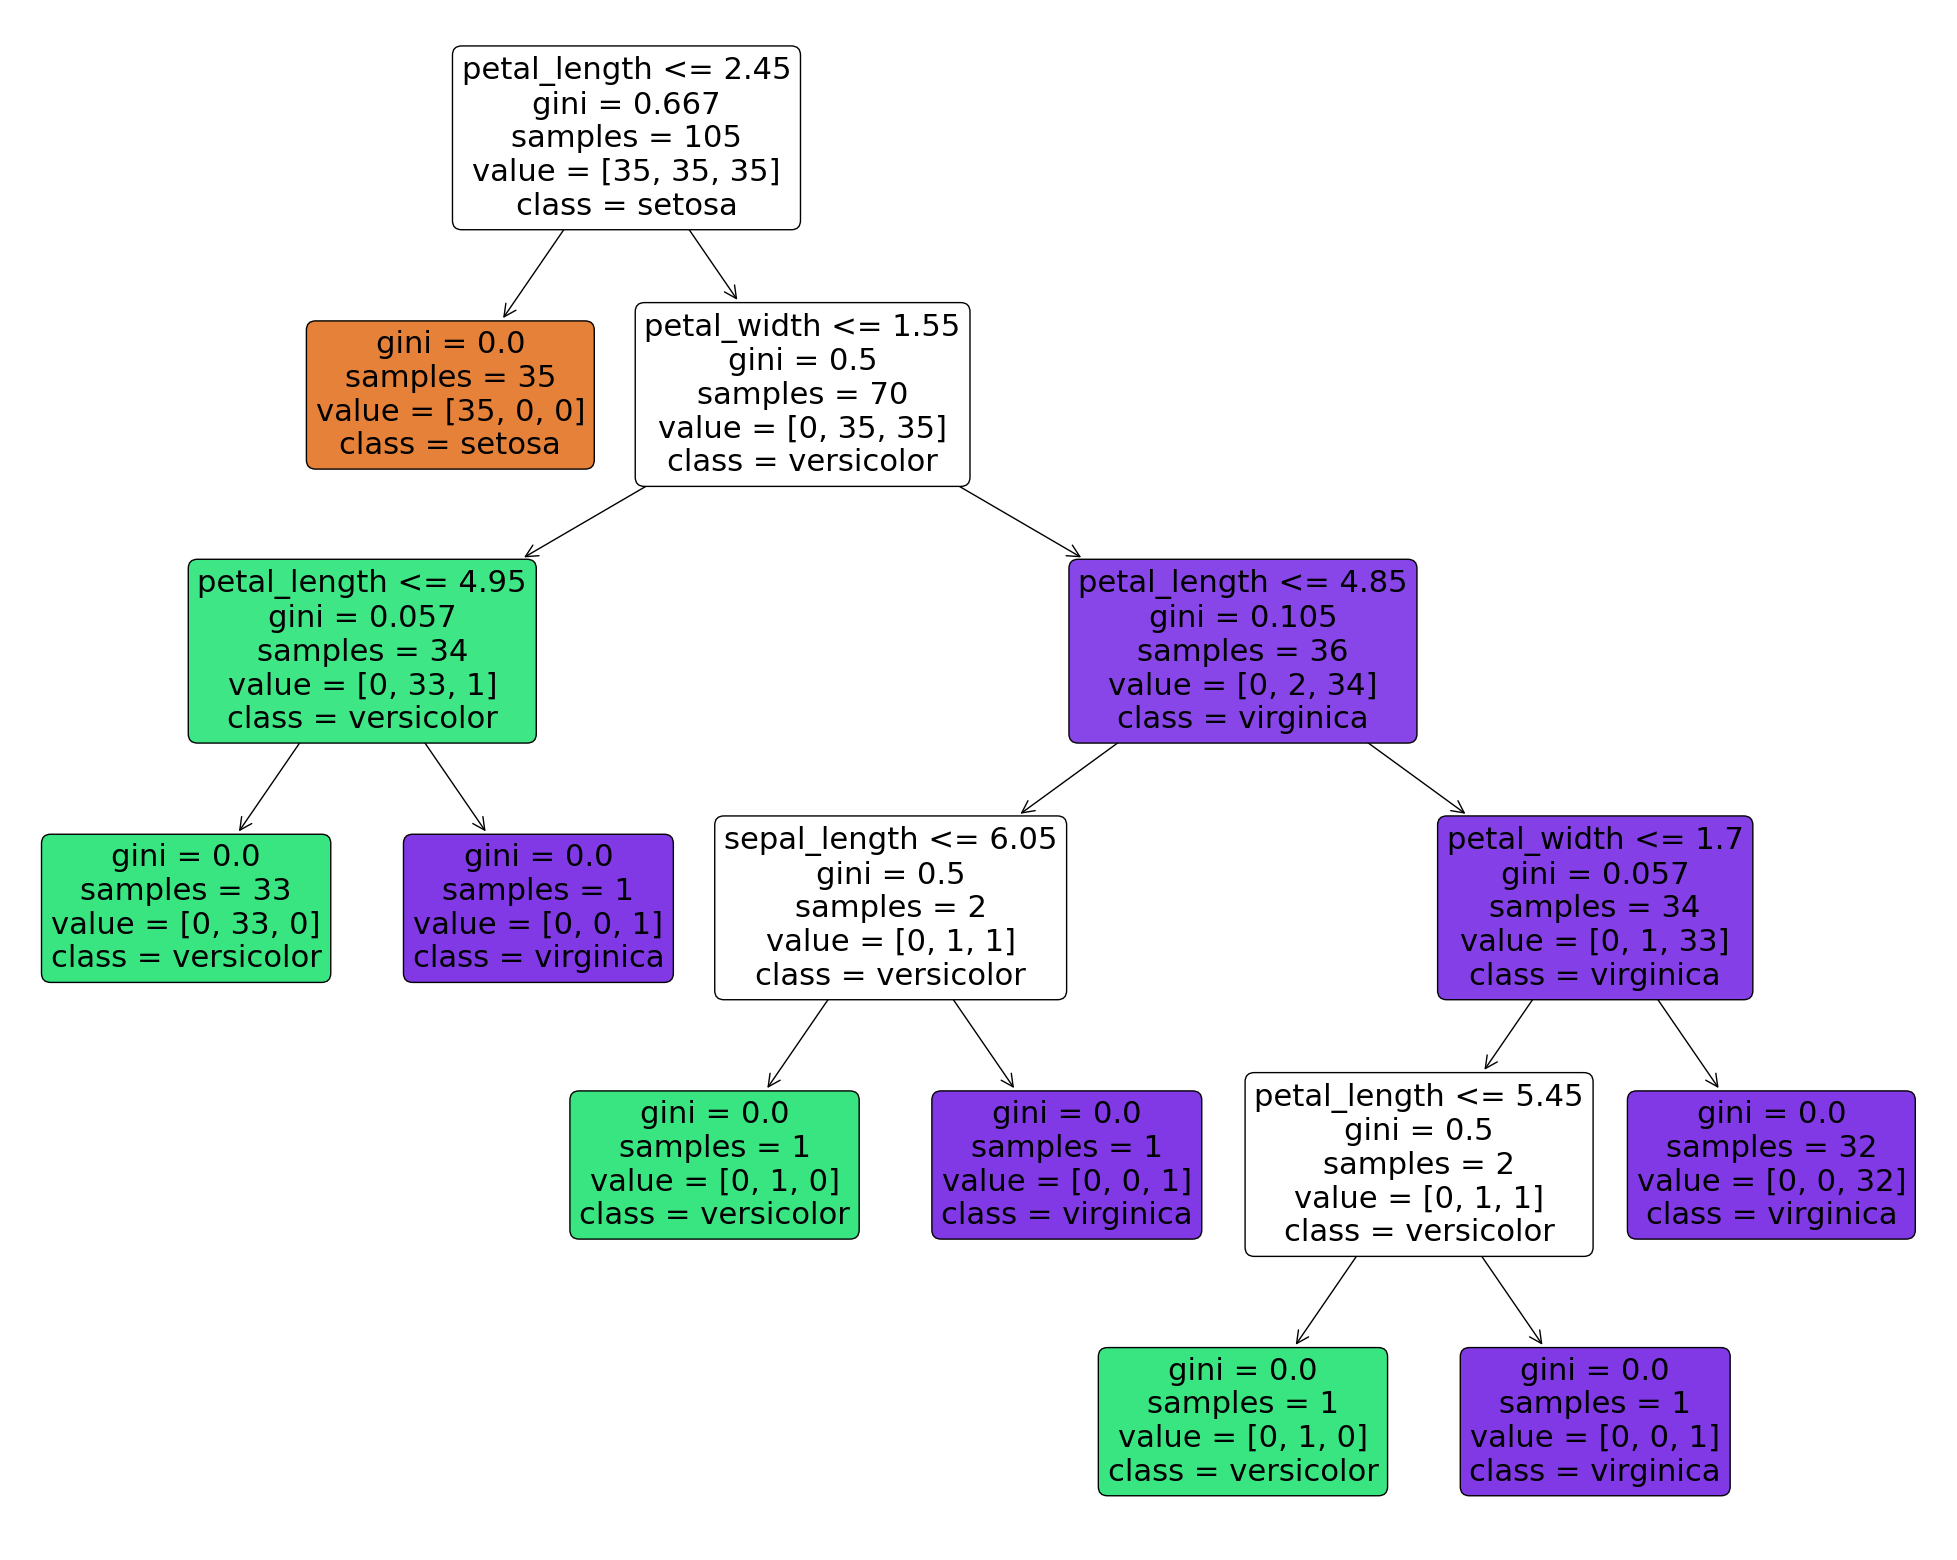

In [13]:
# Plot the decision tree
fig = plt.figure(figsize=(25,20))
plot_tree(dt, feature_names=X.columns, filled=True,
         rounded=True, class_names=iris.species.value_counts().index);

In [14]:
# Print the classification report for test set
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.87      0.87      0.87        15
   virginica       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



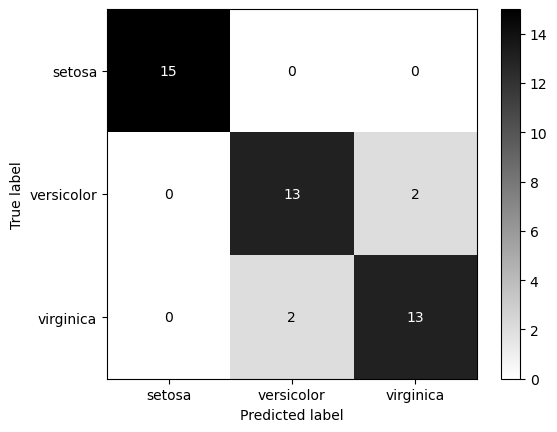

In [15]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='binary')

In [16]:
# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                    test_size=0.3,
                                                   stratify=y,
                                                   random_state=163)

X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 11 to 78
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [17]:
# Create and fit DecisionTreeClassifier on training data
dt2 = DecisionTreeClassifier().fit(X_train2, y_train2)

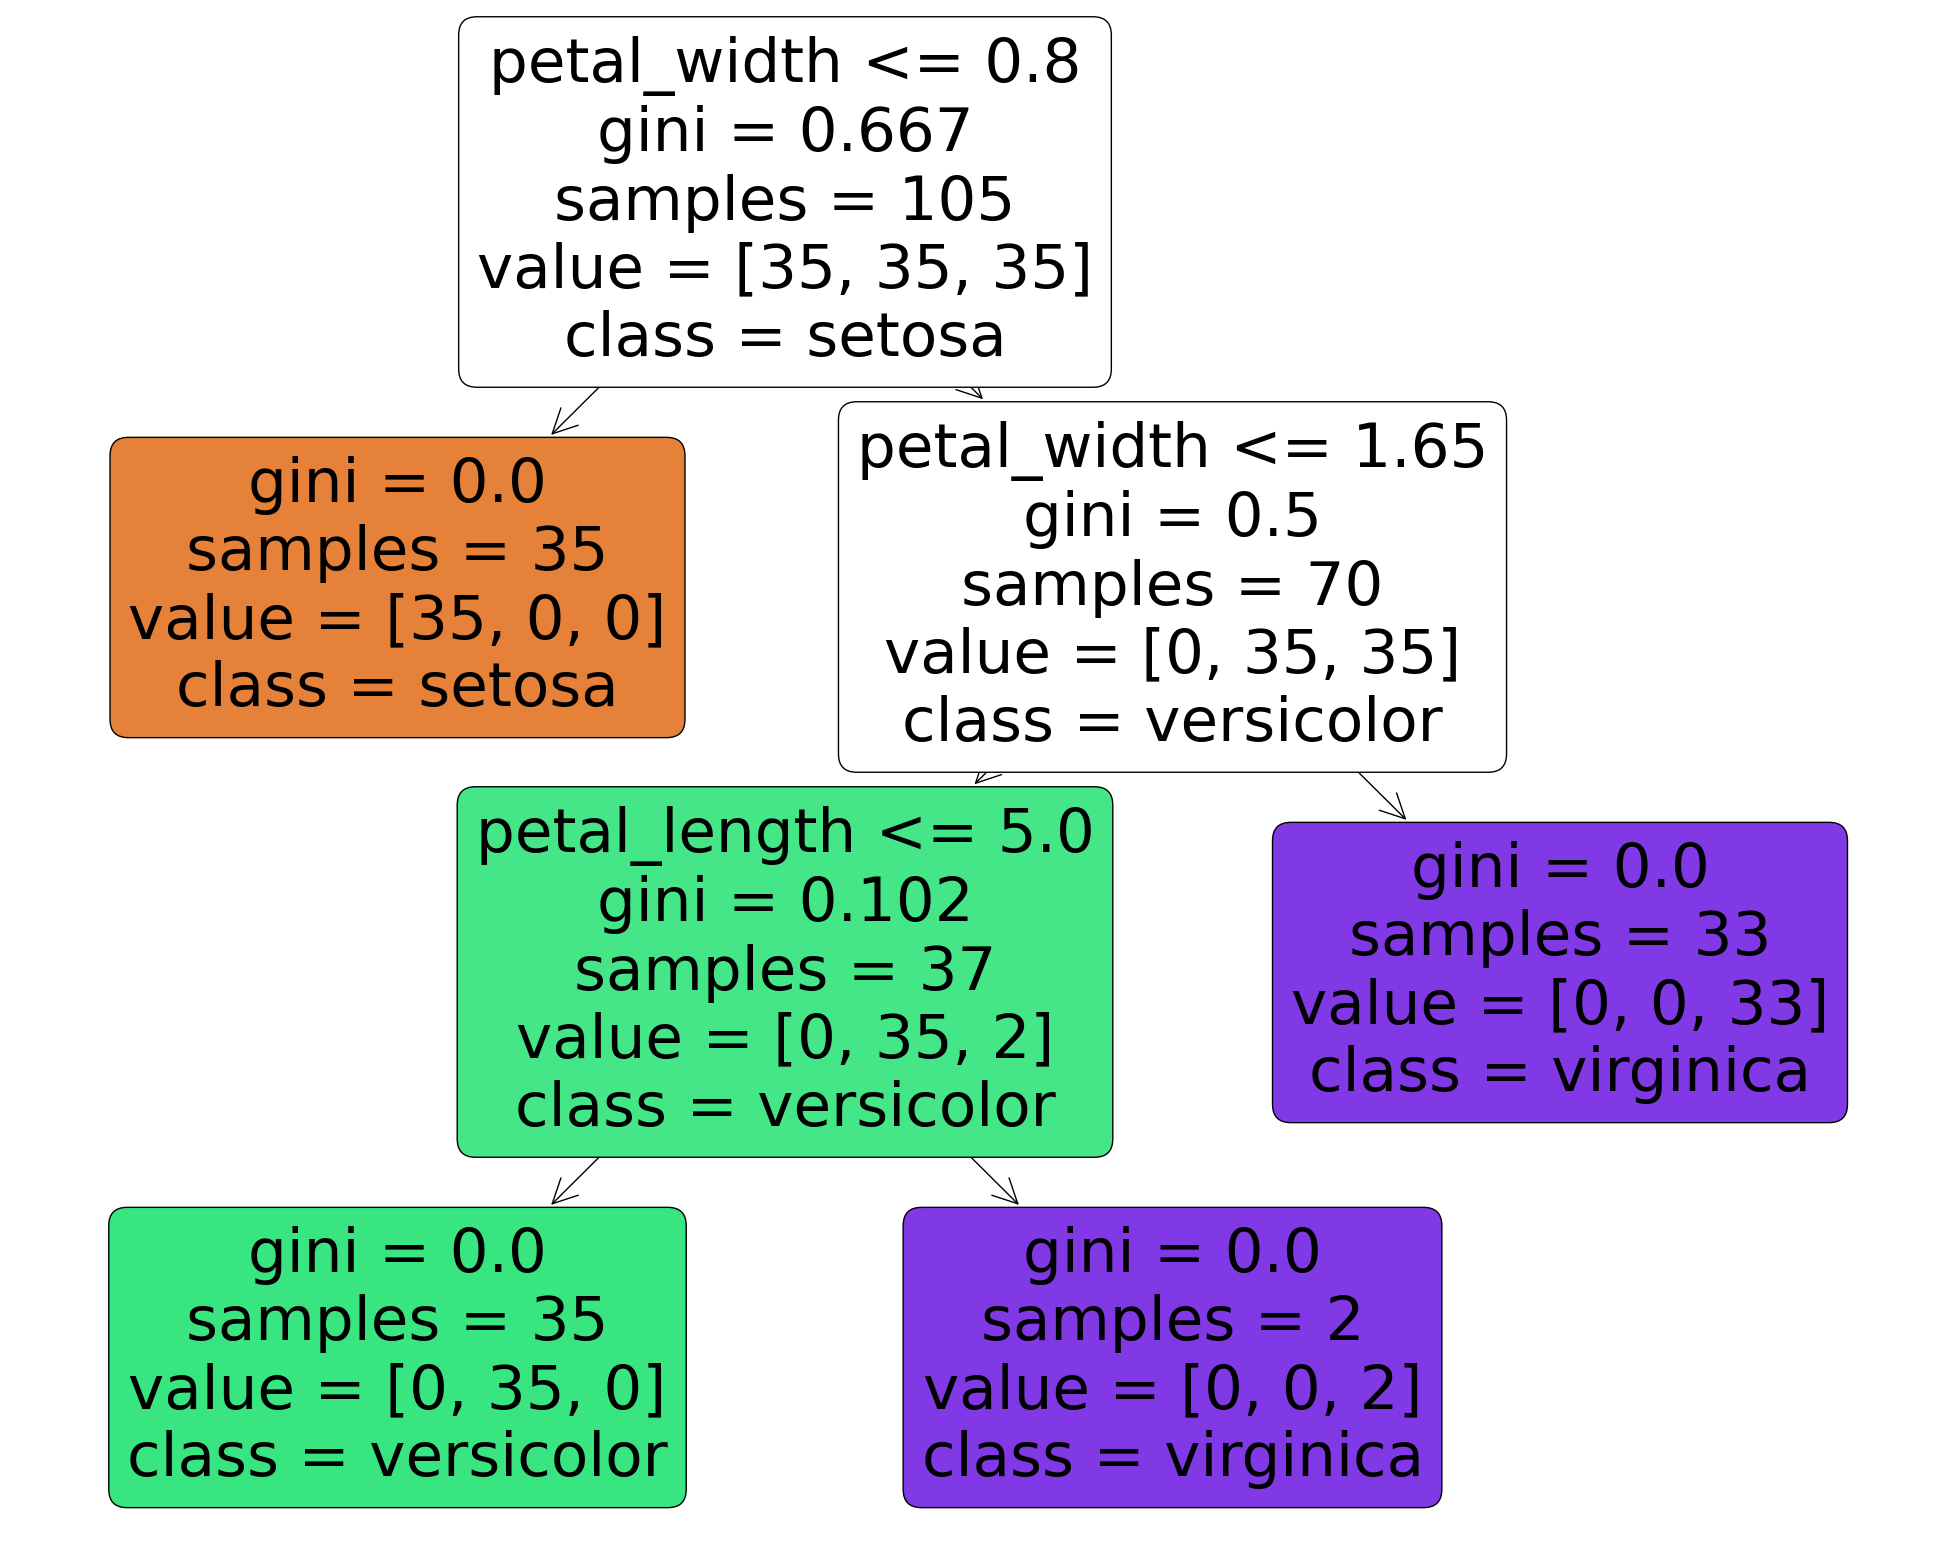

In [18]:
# Plot the decision tree
fig = plt.figure(figsize=(25,20))
plot_tree(dt2, feature_names=X.columns, filled=True,
         rounded=True, class_names=iris.species.value_counts().index);

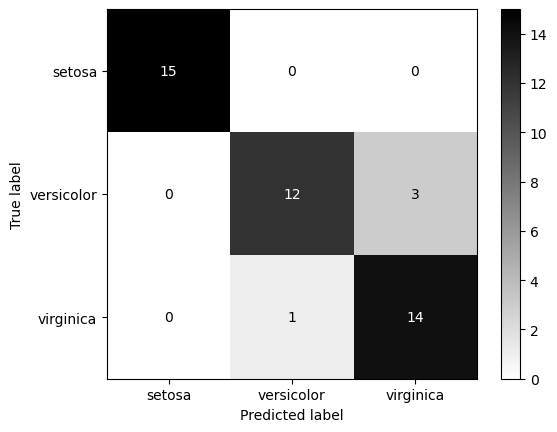

In [19]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt2, X_test2, y_test2, cmap='binary')

## Important Features

One of the nice things about decision trees is that you can infer the importance of each feature/variable by seeing how close to the root node it is. The closer to the root node (top), the more important that feature is for model. Additionally, you can pull out the attribute `feature_importances_` to explicitly see them or plot them.

Let's try it.

In [20]:
# Just see what it looks like
dt.feature_importances_

array([0.01428571, 0.        , 0.55396825, 0.43174603])

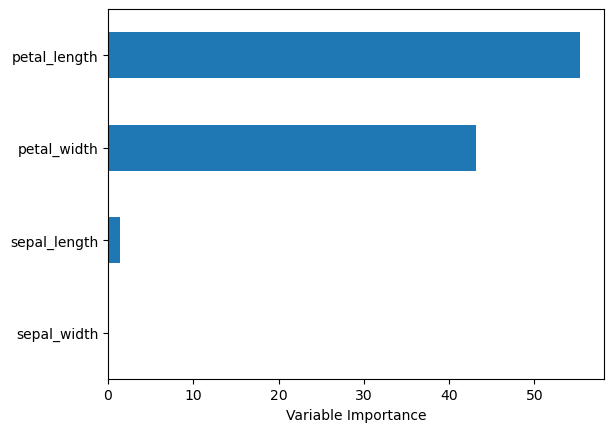

In [21]:
# Now, create a nice bar plot with most important feature on top
importance = pd.DataFrame({'Importance':dt.feature_importances_*100},
                          index=X.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

**&copy; 2023 - Present: Matthew D. Dean, Ph.D.   
Clinical Associate Professor of Business Analytics at William \& Mary.**